ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

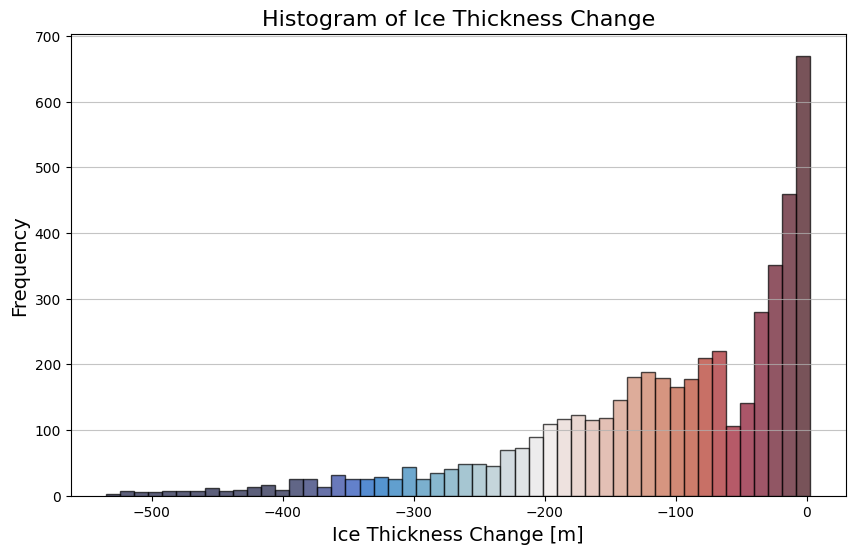

In [26]:
# Assuming your data range is similar to the tripcolor plot (-400 to 0)
data_min, data_max = -400, 0

plt.figure(figsize=(10, 6))
values = data.values.flatten()

# Create a normalized colormap
norm = plt.Normalize(vmin=data_min, vmax=data_max)
cmap = cmo.balance

# Get colors for each value using the colormap
colors = cmap(norm(values))

# Create histogram with colored bars
n, bins, patches = plt.hist(values, bins=50, alpha=0.7, edgecolor='black')

# Color each bar according to its bin center
for i, (bin_start, bin_end) in enumerate(zip(bins[:-1], bins[1:])):
    bin_center = (bin_start + bin_end) / 2
    patches[i].set_facecolor(cmap(norm(bin_center)))

plt.title('Histogram of Ice Thickness Change', fontsize=16)
plt.xlabel('Ice Thickness Change [m]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# Add colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Ice Thickness Change [m]', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

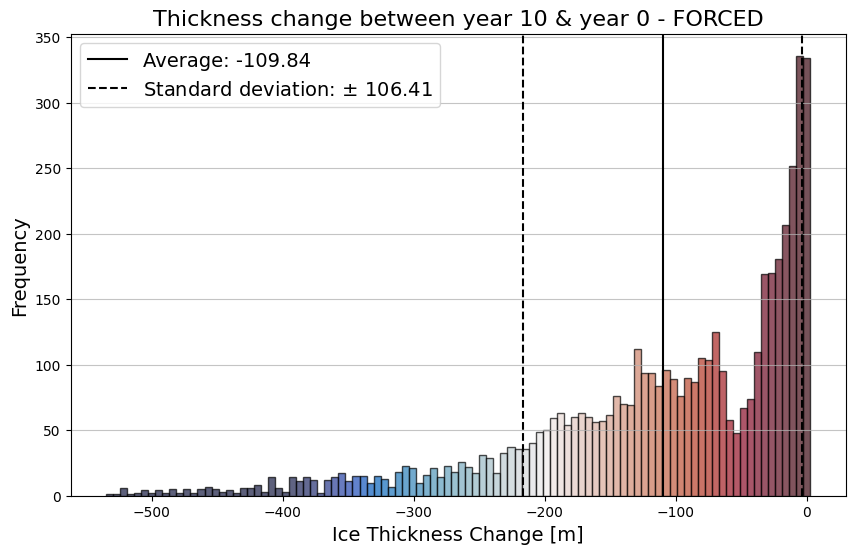

In [27]:
# Assuming your data range is similar to the tripcolor plot (-400 to 0)
data_min, data_max = -400, 0

plt.figure(figsize=(10, 6))
values = data.values.flatten()

# Create a normalized colormap
norm = plt.Normalize(vmin=data_min, vmax=data_max)
cmap = cmo.balance

# Get colors for each value using the colormap
colors = cmap(norm(values))

# Create histogram with colored bars
n, bins, patches = plt.hist(values, bins=100, alpha=0.7, edgecolor='black')

# Color each bar according to its bin center
for i, (bin_start, bin_end) in enumerate(zip(bins[:-1], bins[1:])):
    bin_center = (bin_start + bin_end) / 2
    patches[i].set_facecolor(cmap(norm(bin_center)))
    # Add a horizontal line for the average
average = np.nanmean(values)  # Calculate the average, ignoring NaN values
plt.axvline(x=average, color='black', linestyle='-', linewidth=1.5, label=f'Average: {average:.2f}')
plt.legend(fontsize=14)

std = np.nanstd(values)  # Calculate the average, ignoring NaN values
plt.axvline(x=std +average, color='black', linestyle='--', linewidth=1.5, label=f'Standard deviation: $\pm$ {std:.2f}')
plt.axvline(x=-std +average, color='black', linestyle='--', linewidth=1.5)
plt.legend(fontsize=14)


plt.title('Thickness change between year 10 & year 0 - FORCED', fontsize=16)
plt.xlabel('Ice Thickness Change [m]', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)

# Add colorbar to show the mapping
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('Ice Thickness Change [m]', fontsize=14)
#cbar.ax.tick_params(labelsize=12)

plt.show()

Data range: 0.0 to 300.0 m


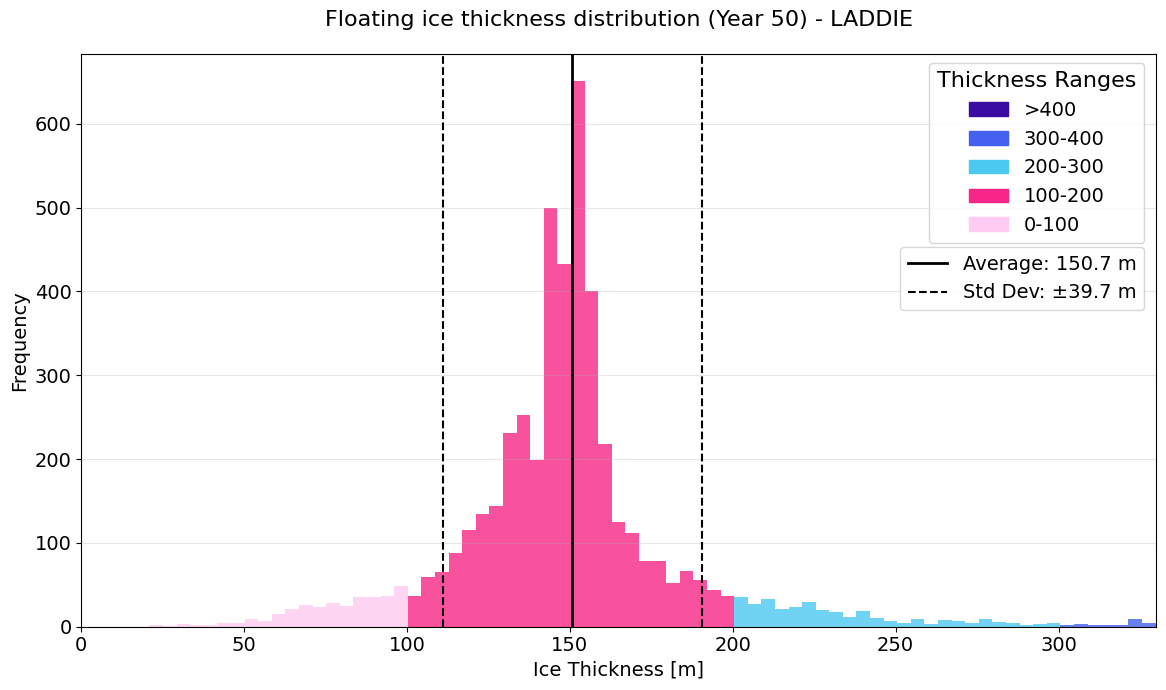

In [ ]:
# Your custom color bins
solid_colors = {
    '>400': '#3A0CA3',   # Deep blue
    '300-400': '#4361EE', # Bright blue
    '200-300': '#4CC9F0', # Light teal-blue
    '100-200': '#F72585', # Vibrant pink
    '0-100': '#FFCBF2'    # Light pink
}

# Load your data
data = Hi_l[50].where(mask_rock & mask_ocean).values.flatten()
data = data[~np.isnan(data)]  # Remove NaN values

# Calculate data range
data_min, data_max = 0, 300
print(f"Data range: {data_min:.1f} to {data_max:.1f} m")  # Verify range matches expectations

# Create figure
plt.figure(figsize=(12, 7))

# Set number of bins (25x typical amount)
num_bins = 100  # 25 * 8

# Create histogram with fine bins
n, bins, patches = plt.hist(data, bins=num_bins, 
                           edgecolor='none', 
                           alpha=0.8)

# Color each bar according to your thresholds
for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
    bin_center = (bin_left + bin_right)/2
    
    if bin_center > 400:
        patch.set_facecolor(solid_colors['>400'])
    elif bin_center > 300:
        patch.set_facecolor(solid_colors['300-400'])
    elif bin_center > 200:
        patch.set_facecolor(solid_colors['200-300'])
    elif bin_center > 100:
        patch.set_facecolor(solid_colors['100-200'])
    else:
        patch.set_facecolor(solid_colors['0-100'])

# Add statistical markers
average = np.nanmean(data)
std = np.nanstd(data)
avg_line = plt.axvline(x=average, color='black', linestyle='-', linewidth=2)
std_line = plt.axvline(x=average + std, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=average - std, color='black', linestyle='--', linewidth=1.5)

# Create combined legend
from matplotlib.lines import Line2D

# Color range patches
color_patches = [mpatches.Patch(color=color, label=label) 
                for label, color in solid_colors.items()]

# Statistical line markers
stat_lines = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label=f'Average: {average:.1f} m'),
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label=f'Std Dev: ±{std:.1f} m')
]

# Combine both legends
first_legend = plt.legend(handles=color_patches, 
                         bbox_to_anchor=(0.78, 1), 
                         loc='upper left',
                         title='Thickness Ranges', fontsize=14, title_fontsize=16)

# Add the second legend manually
plt.gca().add_artist(first_legend)
plt.legend(handles=stat_lines, 
          bbox_to_anchor=(0.753, 0.68), 
          loc='upper left', fontsize=14, title_fontsize=16)
# Format plot
plt.title(f'Floating ice thickness Distribution (Year 50) - LADDIE', fontsize=16, pad=20)
plt.xlabel('Ice Thickness [m]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xlim(max(0, data_min*0.9), min(500, data_max*1.1))

plt.tight_layout()
plt.show()


Data range: 0.0 to 300.0 m


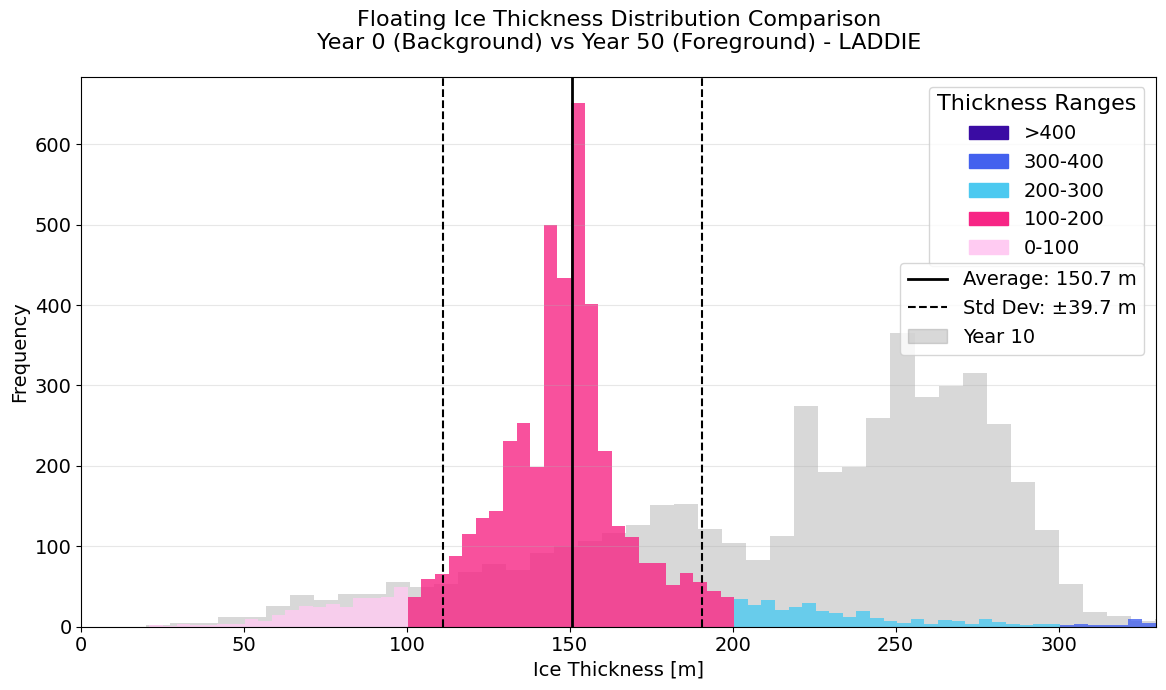

In [37]:
# Your custom color bins
solid_colors = {
    '>400': '#3A0CA3',   # Deep blue
    '300-400': '#4361EE', # Bright blue
    '200-300': '#4CC9F0', # Light teal-blue
    '100-200': '#F72585', # Vibrant pink
    '0-100': '#FFCBF2'    # Light pink
}

# Load your data for both years
data_year50 = Hi_l[50].where(mask_rock & mask_ocean).values.flatten()
data_year50 = data_year50[~np.isnan(data_year50)]  # Remove NaN values

data_year0 = Hi_l[10].where(mask_rock & mask_ocean).values.flatten()
data_year0 = data_year0[~np.isnan(data_year0)]  # Remove NaN values

# Calculate data range
data_min, data_max = 0, 300
print(f"Data range: {data_min:.1f} to {data_max:.1f} m")  # Verify range matches expectations

# Create figure
plt.figure(figsize=(12, 7))

# Set number of bins
num_bins = 100

# First plot the year 0 distribution in background (faded)
n0, bins0, patches0 = plt.hist(data_year0, bins=num_bins, 
                              edgecolor='none', 
                              alpha=0.3,  # More transparent
                              color='gray',  # Unified faded color
                              label='Year 0 Distribution')

# Then plot the year 50 distribution
n50, bins50, patches50 = plt.hist(data_year50, bins=num_bins, 
                                edgecolor='none', 
                                alpha=0.8)

# Color each bar according to your thresholds (only for year 50)
for patch, bin_left, bin_right in zip(patches50, bins50[:-1], bins50[1:]):
    bin_center = (bin_left + bin_right)/2
    
    if bin_center > 400:
        patch.set_facecolor(solid_colors['>400'])
    elif bin_center > 300:
        patch.set_facecolor(solid_colors['300-400'])
    elif bin_center > 200:
        patch.set_facecolor(solid_colors['200-300'])
    elif bin_center > 100:
        patch.set_facecolor(solid_colors['100-200'])
    else:
        patch.set_facecolor(solid_colors['0-100'])

# Add statistical markers (for year 50)
average = np.nanmean(data_year50)
std = np.nanstd(data_year50)
avg_line = plt.axvline(x=average, color='black', linestyle='-', linewidth=2)
std_line = plt.axvline(x=average + std, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=average - std, color='black', linestyle='--', linewidth=1.5)

# Create combined legend
from matplotlib.lines import Line2D

# Color range patches
color_patches = [mpatches.Patch(color=color, label=label) 
                for label, color in solid_colors.items()]

# Statistical line markers
stat_lines = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label=f'Average: {average:.1f} m'),
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label=f'Std Dev: ±{std:.1f} m'),
    mpatches.Patch(color='gray', alpha=0.3, label='Year 10 ')
]

# Combine all legends
first_legend = plt.legend(handles=color_patches, 
                         bbox_to_anchor=(0.78, 1), 
                         loc='upper left',
                         title='Thickness Ranges', 
                         fontsize=14, 
                         title_fontsize=16)

# Add the second legend manually
plt.gca().add_artist(first_legend)
plt.legend(handles=stat_lines, 
          bbox_to_anchor=(0.753, 0.68), 
          loc='upper left', 
          fontsize=14)

# Format plot
plt.title('Floating Ice Thickness Distribution Comparison\nYear 0 (Background) vs Year 50 (Foreground) - LADDIE', 
          fontsize=16, pad=20)
plt.xlabel('Ice Thickness [m]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xlim(max(0, data_min*0.9), min(500, data_max*1.1))

plt.tight_layout()
plt.show()

Data range: 0.0 to 300.0 m


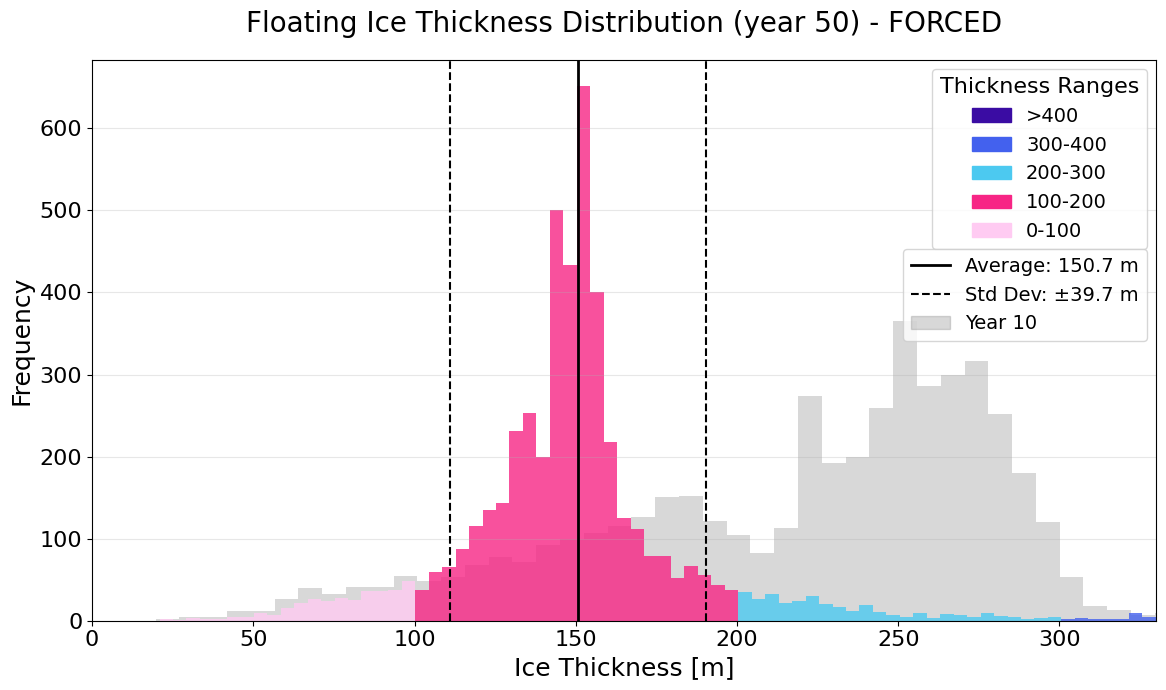

In [42]:
# Your custom color bins
solid_colors = {
    '>400': '#3A0CA3',   # Deep blue
    '300-400': '#4361EE', # Bright blue
    '200-300': '#4CC9F0', # Light teal-blue
    '100-200': '#F72585', # Vibrant pink
    '0-100': '#FFCBF2'    # Light pink
}

# Load your data for both years
data_year50 = Hi_l[50].where(mask_rock & mask_ocean).values.flatten()
data_year50 = data_year50[~np.isnan(data_year50)]  # Remove NaN values

data_year0 = Hi_l[10].where(mask_rock & mask_ocean).values.flatten()
data_year0 = data_year0[~np.isnan(data_year0)]  # Remove NaN values

# Calculate data range
data_min, data_max = 0, 300
print(f"Data range: {data_min:.1f} to {data_max:.1f} m")  # Verify range matches expectations

# Create figure
plt.figure(figsize=(12, 7))

# Set number of bins
num_bins = 100

# First plot the year 0 distribution in background (faded)
n0, bins0, patches0 = plt.hist(data_year0, bins=num_bins, 
                              edgecolor='none', 
                              alpha=0.3,  # More transparent
                              color='gray',  # Unified faded color
                              label='Year 0 Distribution')

# Then plot the year 50 distribution
n50, bins50, patches50 = plt.hist(data_year50, bins=num_bins, 
                                edgecolor='none', 
                                alpha=0.8)

# Color each bar according to your thresholds (only for year 50)
for patch, bin_left, bin_right in zip(patches50, bins50[:-1], bins50[1:]):
    bin_center = (bin_left + bin_right)/2
    
    if bin_center > 400:
        patch.set_facecolor(solid_colors['>400'])
    elif bin_center > 300:
        patch.set_facecolor(solid_colors['300-400'])
    elif bin_center > 200:
        patch.set_facecolor(solid_colors['200-300'])
    elif bin_center > 100:
        patch.set_facecolor(solid_colors['100-200'])
    else:
        patch.set_facecolor(solid_colors['0-100'])

# Add statistical markers (for year 50)
average = np.nanmean(data_year50)
std = np.nanstd(data_year50)
avg_line = plt.axvline(x=average, color='black', linestyle='-', linewidth=2)
std_line = plt.axvline(x=average + std, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=average - std, color='black', linestyle='--', linewidth=1.5)

# Create combined legend
from matplotlib.lines import Line2D

# Color range patches
color_patches = [mpatches.Patch(color=color, label=label) 
                for label, color in solid_colors.items()]

# Statistical line markers
stat_lines = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label=f'Average: {average:.1f} m'),
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label=f'Std Dev: ±{std:.1f} m'),
    mpatches.Patch(color='gray', alpha=0.3, label='Year 10 ')
]

# Combine all legends
first_legend = plt.legend(handles=color_patches, 
                         bbox_to_anchor=(0.78, 1), 
                         loc='upper left',
                         title='Thickness Ranges', 
                         fontsize=14, 
                         title_fontsize=16)

# Add the second legend manually
plt.gca().add_artist(first_legend)
plt.legend(handles=stat_lines, 
          bbox_to_anchor=(0.753, 0.68), 
          loc='upper left', 
          fontsize=14)

# Format plot
plt.title('Floating Ice Thickness Distribution (year 50) - FORCED', 
          fontsize=20, pad=20)
plt.xlabel('Ice Thickness [m]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Frequency', fontsize=18)
plt.grid(axis='y', alpha=0.3)
plt.xlim(max(0, data_min*0.9), min(500, data_max*1.1))

plt.tight_layout()
plt.show()

In [55]:
plt.close('all')

# New tests 

# Decades


/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_3990/1811847402.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)  # Reduced padding


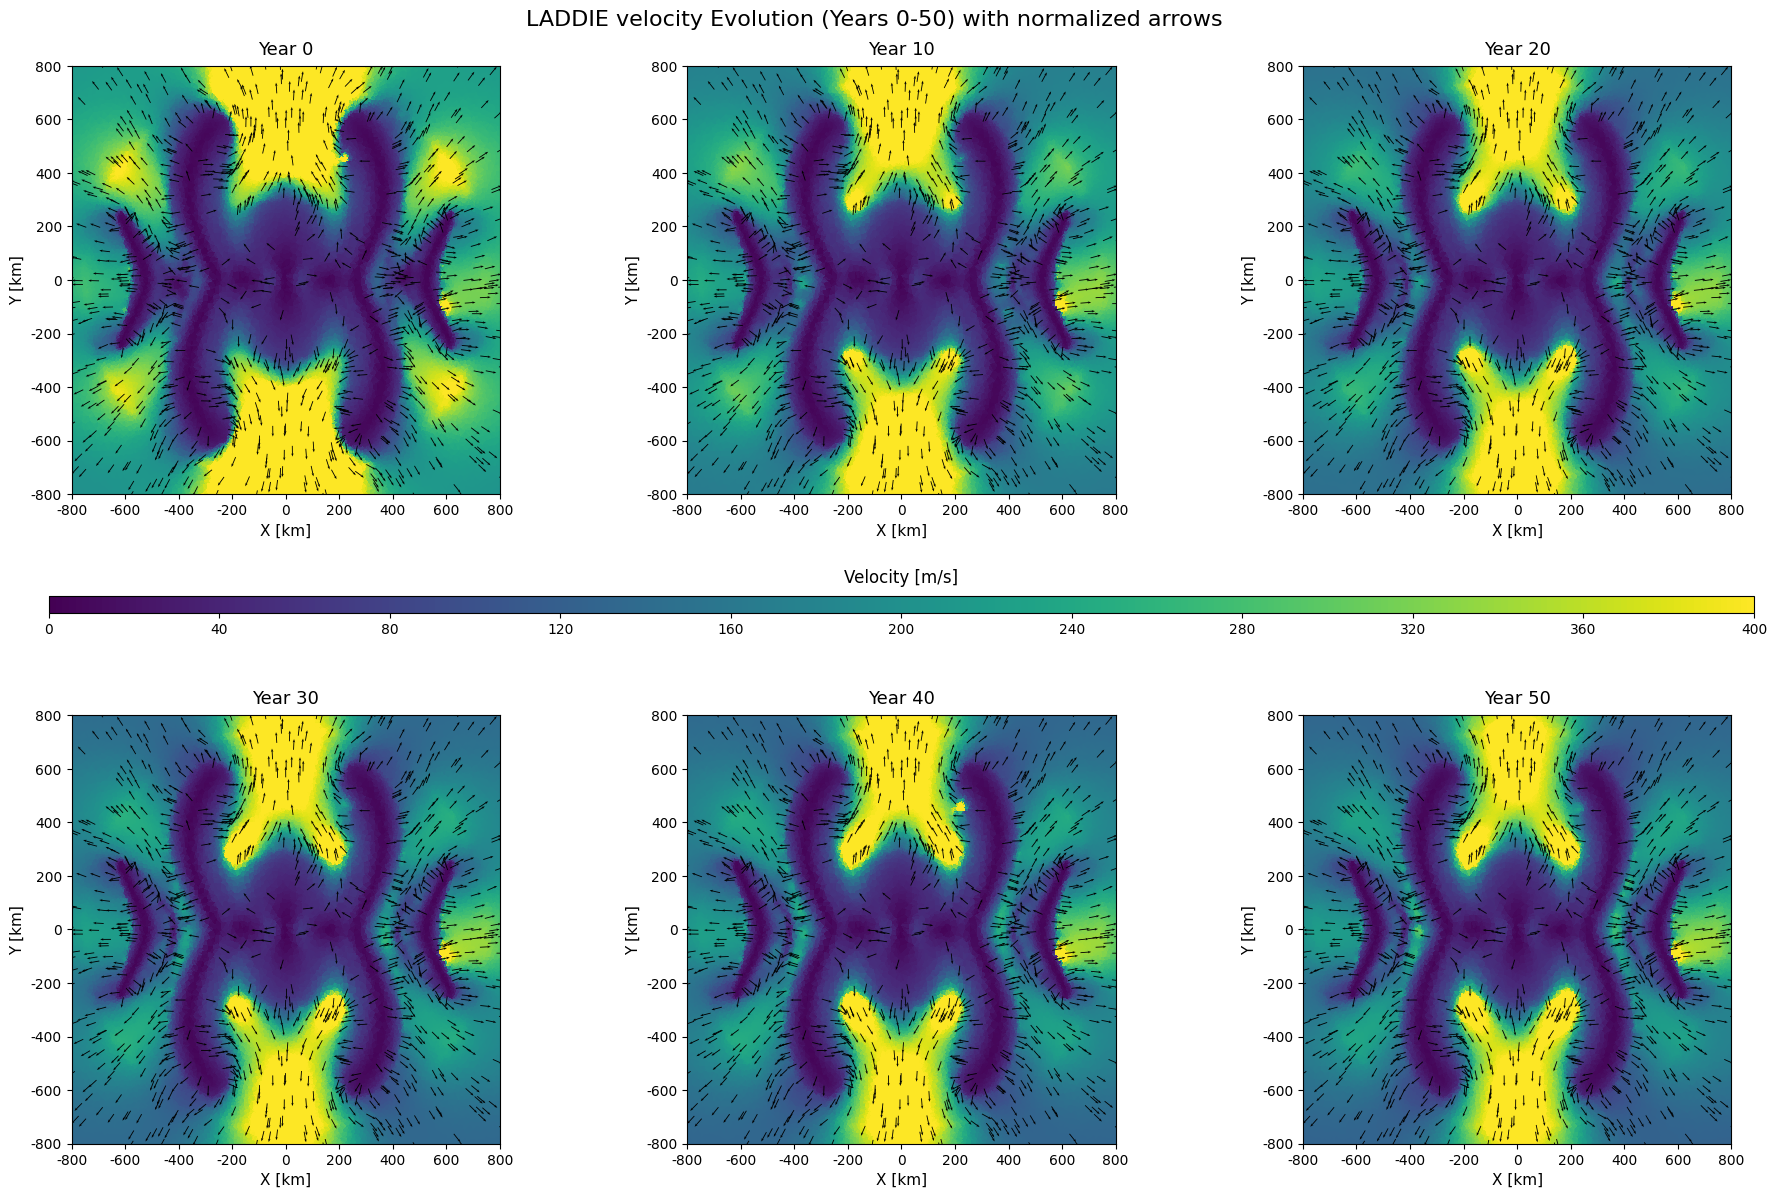

In [60]:
u_s = Lad['u_surf']
v_s = Lad['v_surf']
          
magice = np.sqrt(u_s**2 +v_s**2)
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

m = 20
Tricc = Lad['Tricc']

fig = plt.figure(figsize=(22, 14))  # Slightly reduced figure size
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.04, 1], hspace=0.35, wspace=0.3)  # Tighter spacing

# Create subplots
axes = []
for i in range(6):
    if i < 3:
        axes.append(fig.add_subplot(gs[0, i]))  # First row
    else:
        axes.append(fig.add_subplot(gs[2, i-3]))  # Third row

# Create horizontal colorbar axis between rows
cax = fig.add_subplot(gs[1, :])  # Span all columns in middle row

for i, year in enumerate(years):
    ax = axes[i]

    # Main plot with contour lines
    c0 = ax.tripcolor(
        Tricc[0, :], 
        Tricc[1, :], 
        magice[year], 
        cmap='viridis', 
        vmin=0, 
        vmax=400

    )
    # Axis formatting
    ax.set_title(f'Year {year}', fontsize=13, pad=8)  # Reduced padding
    ax.set_xlabel('X [km]', fontsize=11)
    ax.set_ylabel('Y [km]', fontsize=11)
    ax.set_xticks(np.arange(-n, n+1, 200000))
    ax.set_yticks(np.arange(-n, n+1, 200000))
    ax.set_xticklabels(np.arange(-800, 801, 200))  # Direct labels
    ax.set_yticklabels(np.arange(-800, 801, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')


    u_s_norm = u_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)
    v_s_norm = v_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)


    ax.quiver(Tricc[0, :][::m],
        Tricc[1, :][::m],
        u_s_norm,
        v_s_norm,
        scale=40,
        width=0.002,
        headwidth=3,
        headlength=4,
        headaxislength=3
    )


# Colorbar formatting
cbar = fig.colorbar(c0, cax=cax, orientation='horizontal')
cbar.set_label('Velocity [m/s]', fontsize=12, labelpad=10)
cbar.set_ticks(np.linspace(0, 400, 11))  # Add evenly spaced ticks
cax.xaxis.set_ticks_position('bottom')
cax.xaxis.set_label_position('top')

# Main title with adjusted position
plt.suptitle('LADDIE velocity Evolution (Years 0-50) with normalized arrows', 
            fontsize=16, y=0.92)  # More compact title
plt.tight_layout(pad=1.5)  # Reduced padding
plt.show()
